In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
from scipy.io import loadmat

In [357]:
data_at5 = loadmat('Données/data_at5.mat') 
#X=data_at4["X"]

data=data_at5['data']

data_df=pd.DataFrame(data)
X=data[:,0:4]
Y=data[:,4]

Z=data_at5['Z']
#pd.DataFrame(Z).transpose()



On se propose d’analyser visuellement les données selon 
les 3 classes.

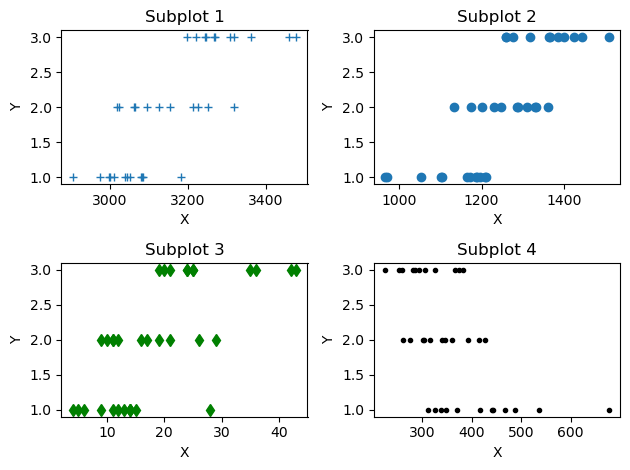

In [358]:
Test = data[data[:, 1].argsort()]

# Création des sous-graphiques
fig, axs = plt.subplots(2, 2)

# Sous-graphique 1
axs[0, 0].plot(Test[:, 0], Test[:, 4], '+')
axs[0, 0].set_title('Subplot 1')
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('Y')

# Sous-graphique 2
axs[0, 1].plot(Test[:, 1], Test[:, 4], 'o')
axs[0, 1].set_title('Subplot 2')
axs[0, 1].set_xlabel('X')
axs[0, 1].set_ylabel('Y')

# Sous-graphique 3
axs[1, 0].plot(Test[:, 2], Test[:, 4], 'gd')
axs[1, 0].set_title('Subplot 3')
axs[1, 0].set_xlabel('X')
axs[1, 0].set_ylabel('Y')

# Sous-graphique 4
axs[1, 1].plot(Test[:, 3], Test[:, 4], 'k.')
axs[1, 1].set_title('Subplot 4')
axs[1, 1].set_xlabel('X')
axs[1, 1].set_ylabel('Y')

# Ajustement des espacements
plt.tight_layout()

# Affichage du graphique
plt.show()

En visualisant ces graphiques nous remarquons que la variable **2**  peut être considérée comme le premier critére de scission de la population car elle sépare la population mieux que les autres variables. En effet,
elle sépare parfaitement les classes **1** et **3** .

**Avec les méthodes de classification sur python**

In [359]:
from sklearn.model_selection import train_test_split
#On sépare l'echantillon en base d'apprentissage et base de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10) 

from sklearn.tree import DecisionTreeClassifier, plot_tree

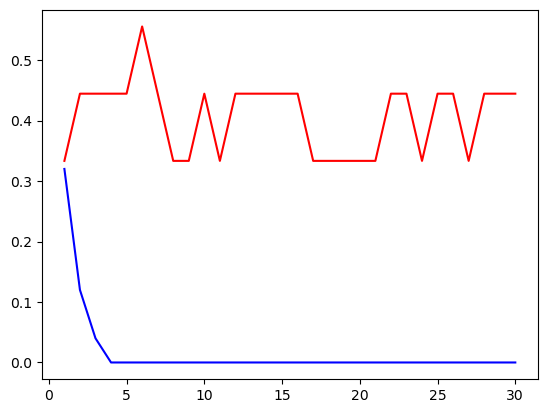

In [360]:
P_test = [] 
P_train = []
for i in np.arange(1,31):
    tree = DecisionTreeClassifier(max_depth = i)
    tree.fit(X_train, y_train)
    P_test.append((y_test != tree.predict(X_test)).mean())
    P_train.append((y_train != tree.predict(X_train)).mean())
    

plt.plot(np.arange(1,31), P_test, 'r-')  
plt.plot(np.arange(1,31), P_train, 'b-')  

Pour automatiser cette boucle on peut utiliser la fonction GridSearchCV.

In [361]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'max_depth': np.arange(1,41)}

# tree = DecisionTreeClassifier()
# clf = GridSearchCV(tree, parameters)
# clf.fit(X_train, y_train)

# clf.best_estimator_# Profondeur optimale


In [362]:
tree = DecisionTreeClassifier(max_depth = 4, random_state=10)
tree.fit(X_train, y_train)

#X_train.shape[0]

DecisionTreeClassifier(max_depth=4, random_state=10)

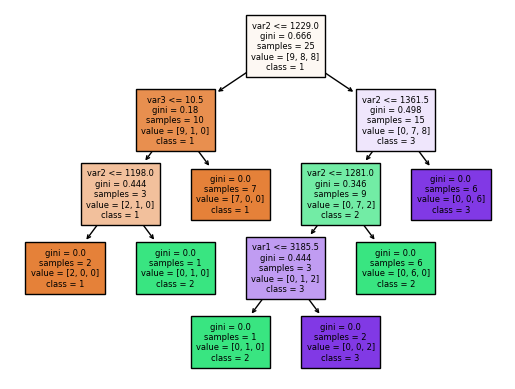

In [363]:
#Affichage de l'abre de décision obtenu après entraînement
plot_tree(tree, feature_names= ['var1','var2','var3','var4'], class_names=["1","2","3"],filled=True, fontsize=6)
plt.show()

l'erreur de claissification sur la base test est : 0.3333333333333333


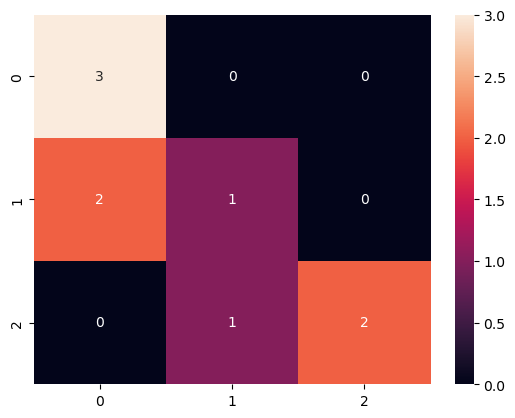

In [364]:
(tree.predict(X_test)!= y_test).mean()
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf = confusion_matrix(y_test, tree.predict(X_test))
sns.heatmap(conf, annot=True)

print("l'erreur de claissification sur la base test est :", (y_test != tree.predict(X_test)).mean())

On peut constater, en fixant le random_state à 10 au niveau de la séparation de l'echantillon en base d'apprentissage et de test, que  l'erreur de classification sur la base test  reste grande. On a le même constat pour d'autre valeur du randome_state.

Cette erreur est dû au fait qu'en regardant les courbes représentées ci_dessus (erreurs de classification sur la base test et sur celle d'apprentissage), on constate qu'à partir d'une profondeur de 5 (max_depth=5) l'erreur sur la base d'apprentissage devient nulle ce qui implique un sur-ajustement (sur-apprentissage) de notre classifieur sur cet échantillon ainsi donc celui-ci ne sera  pas capable de s'ajuster à de nouvelles données.

<Axes: >

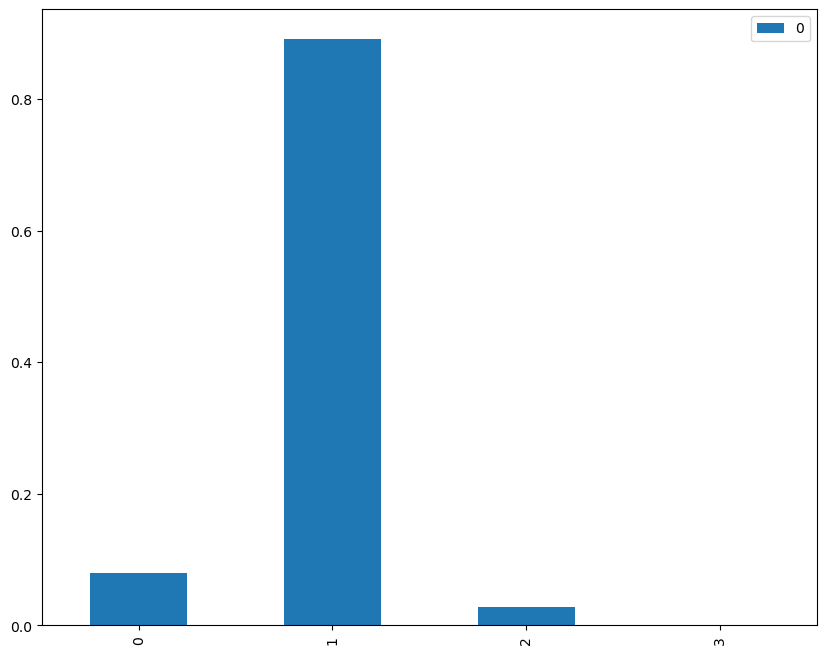

In [365]:
tree.fit(X_train, y_train)
coef=pd.DataFrame(tree.feature_importances_.T)
#coef.index=X_train.columns
coef.plot.bar(figsize=(10,8))

Sur ce graphe nous avons représenté l'importance de chaque variable sur la scission de la population. Ainsi ce graphe semble confirmer que la variable **2** est le premier critére de scission de la population. Elle est suivie de la variable **3**

**On se propose maintenant d’étudier la classification par arbre de décision sur un nouvel
angle : classification hiérarchique**

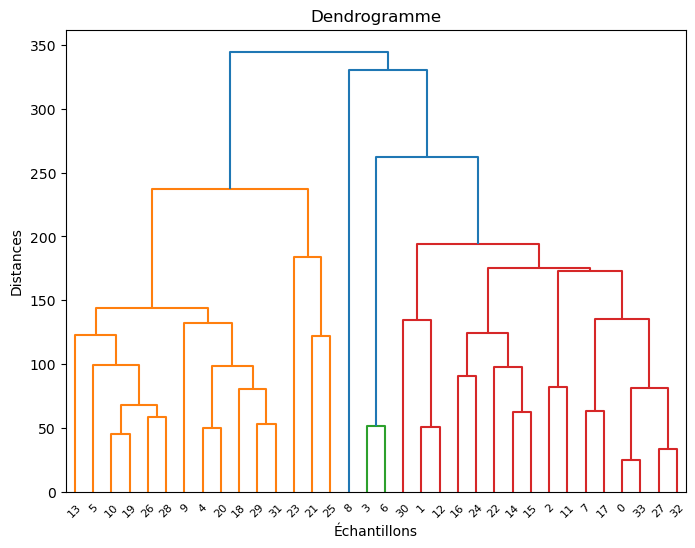

In [366]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# On calcule les distances entre les points
D2_X = pdist(X)

# On  Transforme la matrice des distances en une matrice carrée
B = squareform(D2_X) #la matrice B retourne les distances entres les points du nuage de points des données X


# On effectue une agrégation hiérarchique avec la méthode de liaison 'average'
C2_D = linkage(D2_X, method='average')

# Tracer le dendrogramme
fig, ax = plt.subplots(figsize=(8, 6))
result = dendrogram(C2_D, color_threshold='default', ax=ax)

# Récupérer les hauteurs de nœuds et les étiquettes de feuilles
H = result['dcoord']
T = result['ivl']

# Afficher le dendrogramme
ax.set_title('Dendrogramme')
ax.set_xlabel('Échantillons')
ax.set_ylabel('Distances')
plt.show()